In [158]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
sys.path.append("../")
from data import gestalt
from models import SAVi
from torch.utils.data import DataLoader

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
savi = SAVi.SlotAttentionVideo(num_slots=4)

In [160]:
model_checkpoint_dir = "/om2/user/yyf/GestaltVision/saved_models/SAVI/tex=all_shapes=2,3_slots=4"
models = os.listdir(model_checkpoint_dir)
models.sort()

latest = models[-1]
model_chkpt = os.path.join(model_checkpoint_dir, latest)
chkpt = torch.load(model_chkpt, map_location="cpu")

In [164]:
savi.load_state_dict(chkpt["model"])

<All keys matched successfully>

In [165]:
data = DataLoader(gestalt.Gestalt(root_dir="/om2/user/yyf/CommonFate/scenes",
                                top_level=[f"test_{tex}" for tex in ["voronoi", "wave", "noise"]], 
                                  sub_level=[f"superquadric_{i}" for i in [1, 2, 3, 4]],
                                  frames_per_scene=6,
                                  train_split=0,
                                  training=False
                      ), batch_size=1)
data.training = False
savi.eval()

print(len(data))

0 # training scenes, 60 # test scenes
600


In [166]:
for i, batch in enumerate(data):
    print(batch["scene_dir"], batch["frame_idxs"])

0 64
['/om2/user/yyf/CommonFate/scenes/test_voronoi/superquadric_1/scene_000'] tensor([[1, 2, 3, 4, 5, 6]])
1 64
['/om2/user/yyf/CommonFate/scenes/test_voronoi/superquadric_1/scene_000'] tensor([[ 7,  8,  9, 10, 11, 12]])
2 64
['/om2/user/yyf/CommonFate/scenes/test_voronoi/superquadric_1/scene_000'] tensor([[13, 14, 15, 16, 17, 18]])
3 64
['/om2/user/yyf/CommonFate/scenes/test_voronoi/superquadric_1/scene_000'] tensor([[19, 20, 21, 22, 23, 24]])
4 64
['/om2/user/yyf/CommonFate/scenes/test_voronoi/superquadric_1/scene_000'] tensor([[25, 26, 27, 28, 29, 30]])
5 64
['/om2/user/yyf/CommonFate/scenes/test_voronoi/superquadric_1/scene_000'] tensor([[31, 32, 33, 34, 35, 36]])
6 64
['/om2/user/yyf/CommonFate/scenes/test_voronoi/superquadric_1/scene_000'] tensor([[37, 38, 39, 40, 41, 42]])
7 64
['/om2/user/yyf/CommonFate/scenes/test_voronoi/superquadric_1/scene_000'] tensor([[43, 44, 45, 46, 47, 48]])
8 64
['/om2/user/yyf/CommonFate/scenes/test_voronoi/superquadric_1/scene_000'] tensor([[49, 50

KeyboardInterrupt: 

In [109]:
savi = savi.to("cuda")

In [121]:
batch = data.__getitem__(43)

In [ ]:
for batch in

In [122]:
batch.keys()

dict_keys(['scene', 'frame_idxs', 'scene_dir', 'images', 'masks', 'flows'])

In [124]:
batch["scene"]

0

In [85]:
images = batch["images"].unsqueeze(0).to("cuda")
masks = batch["masks"].unsqueeze(0).to("cuda")
flows = batch["flows"].unsqueeze(0).to("cuda")

In [86]:
out = savi(images, masks[:, :, 0])

In [69]:
recons = out["recons"].squeeze(0).detach().cpu().numpy()
masks = out["masks"].squeeze(0).detach().cpu().numpy()
slots = out["slots"].squeeze(0).detach().cpu().numpy()
recon_all = out["recon_combined"].squeeze(0).detach().cpu().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


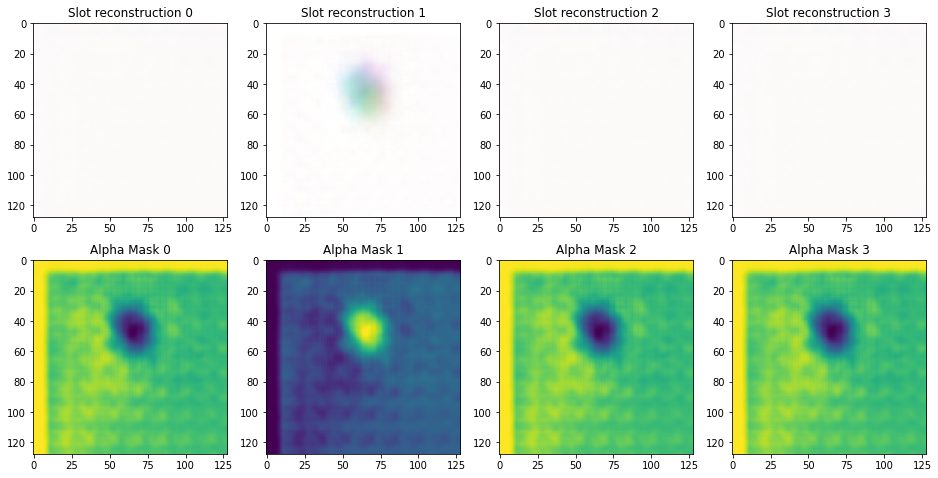

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


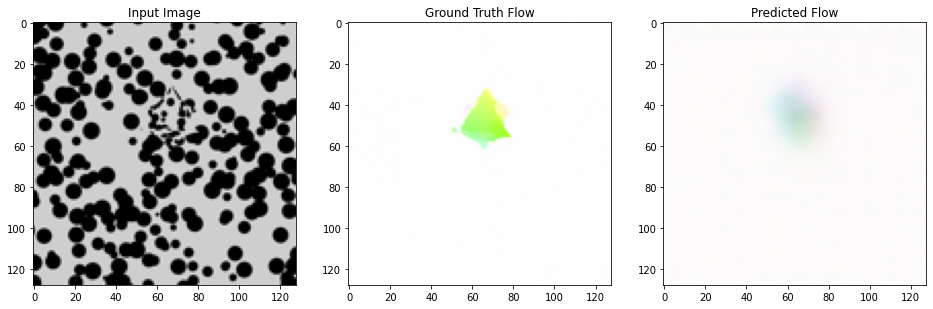

In [75]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
plot_idx = 1
for i in range(4):
    msk = masks[plot_idx, i]
    recon = recons[plot_idx, i]
    axs[1, i].imshow(msk)
    axs[0, i].imshow(recon)
    

    axs[0][i].set_title(f"Slot reconstruction {i}")
    axs[1][i].set_title(f"Alpha Mask {i}")

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(16, 8))
axs[0].imshow(images.squeeze(0).cpu().numpy()[plot_idx].transpose(1, 2, 0))
axs[0].set_title("Input Image")

axs[1].imshow(flows.squeeze(0).cpu().numpy()[plot_idx].transpose(1, 2, 0))
axs[1].set_title("Ground Truth Flow")

axs[2].imshow(recon_all[plot_idx].transpose(1, 2, 0))
axs[2].set_title("Predicted Flow")

plt.show()